In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot

In [3]:
df=pd.read_csv('IOT-temp.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [5]:
df.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [6]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [7]:
 num_val={'Out':1,'In':0}
df['out/in']=df["out/in"].apply(lambda x:num_val[x])
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,0
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,0
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,1
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,1
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,0


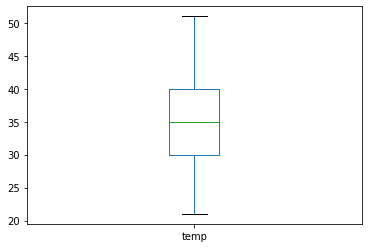

In [8]:
df['temp'].plot.box()

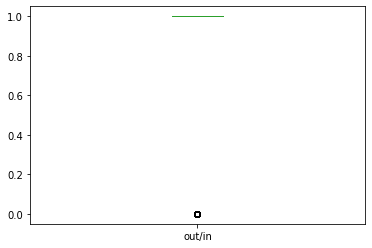

In [9]:
df['out/in'].plot.box()

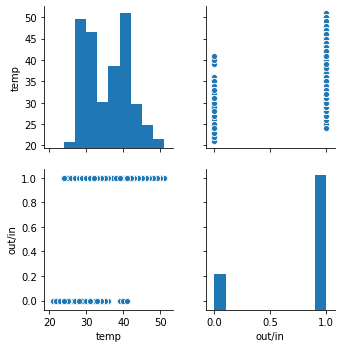

In [10]:
sns.pairplot(df)

In [11]:
x=df.iloc[:,-2].values
x

array([29, 29, 41, ..., 31, 31, 31], dtype=int64)

In [12]:
y=df.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
x.shape

(97606,)

In [14]:
y.shape

(97606,)

In [15]:
x=x.reshape(-1,1)
x

array([[29],
       [29],
       [41],
       ...,
       [31],
       [31],
       [31]], dtype=int64)

In [16]:
y=y.reshape(-1,1)
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.772351615326822
[[  508  5533]
 [ 1133 22108]]
              precision    recall  f1-score   support

           0       0.31      0.08      0.13      6041
           1       0.80      0.95      0.87     23241

    accuracy                           0.77     29282
   macro avg       0.55      0.52      0.50     29282
weighted avg       0.70      0.77      0.72     29282



In [22]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8150741069599071
[[ 1785  4256]
 [ 1159 22082]]
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      6041
           1       0.84      0.95      0.89     23241

    accuracy                           0.82     29282
   macro avg       0.72      0.62      0.64     29282
weighted avg       0.79      0.82      0.79     29282



In [26]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7237210573048289
[[ 2504  3537]
 [ 4553 18688]]
              precision    recall  f1-score   support

           0       0.35      0.41      0.38      6041
           1       0.84      0.80      0.82     23241

    accuracy                           0.72     29282
   macro avg       0.60      0.61      0.60     29282
weighted avg       0.74      0.72      0.73     29282



In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8150741069599071
[[ 1785  4256]
 [ 1159 22082]]
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      6041
           1       0.84      0.95      0.89     23241

    accuracy                           0.82     29282
   macro avg       0.72      0.62      0.64     29282
weighted avg       0.79      0.82      0.79     29282



In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=dt.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))

print(classification_report(y_test,predgbc))

0.8150741069599071
[[ 1785  4256]
 [ 1159 22082]]
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      6041
           1       0.84      0.95      0.89     23241

    accuracy                           0.82     29282
   macro avg       0.72      0.62      0.64     29282
weighted avg       0.79      0.82      0.79     29282



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))

print(classification_report(y_test,predrf))

0.8150741069599071
[[ 1785  4256]
 [ 1159 22082]]
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      6041
           1       0.84      0.95      0.89     23241

    accuracy                           0.82     29282
   macro avg       0.72      0.62      0.64     29282
weighted avg       0.79      0.82      0.79     29282



In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
adb= AdaBoostClassifier()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)
predadb=rf.predict(x_test)
print(accuracy_score(y_test,predadb))
print(confusion_matrix(y_test,predadb))

print(classification_report(y_test,predadb))

0.8150741069599071
[[ 1785  4256]
 [ 1159 22082]]
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      6041
           1       0.84      0.95      0.89     23241

    accuracy                           0.82     29282
   macro avg       0.72      0.62      0.64     29282
weighted avg       0.79      0.82      0.79     29282



From Above Analysis we can conclude that from Decision Tree,RandomForest and Adabooster Classifier we get 81.50% Accuracy.